Dea cuerdo con la infomración presente en la base de datos encontramos que el presente dataset está compuesto por los siguientes atributos:

ID: Identificador único para cada paciente.
Age: Edad en años.
Origin: Lugar del estudio.
Sex: sexo.
cp: Síntoma correspondiente al tipo de dolor.
trestbps: Presión sanguinea en reposo.
chol: colesterol.
fbs: si nivel de azúcar en ayunas > 120 mg/dl
restecg: ECG resultados
thalach: máximo nivel cardíaco conseguido
exang: angina producida por ejercicio (Sí/No)
oldpeak: depresión de ST por ejercicio
slope: la pendiente de ST provocada por el ejercicio
ca: número de vasos mayores (0-3)
thal: tres valores: normal; fixed defect; reversible defect
num: diagnóstico

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('heart_disease_uci.csv')

In [3]:
df.shape

(920, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


Estas dos últimas funciones proporcionan información general del dataset. Podemos ver que hay 920 observaciones y 16 variables distintas.

De estas, 8 son varaibles numericas, de las que 5 son variables con valores contínuos. Las 8 variables restantes son variables categóricas.

Podemos ver que algunas de estas variables tienen muchos atributos con valores nulos. Por ejemplo, la variable "ca" tiene 309 de 920 observaciones. 


In [5]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


Además, la variable "dataset" contiene información sobre el las instituciones que han colaborado en hacer este dataset. Esta variable no aporta información relevante sobre el diagnóstico de la enfermedad. Por lo tanto, será eliminada.

In [6]:
df = df.drop(columns=['dataset'])

In [7]:
df.head()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


La variable "num" es la variable que queremos predecir. 0 significa que la persona no tenía la enfermedad y valores más altos corresponden a diferentes etapas de la enfermedad.

De esta manera, he creado dos variables: una que corresponda al diagnóstico que indica si la persona está enferma o no. Y otra  que contenga el detalle de la etapa en la que se encuentra el paciente.

In [8]:
df = df.rename(columns={'num': 'stage'})
df.head()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,stage
0,1,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [9]:
df['diagnosis'] = df['stage']
df.head()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,stage,diagnosis
0,1,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0,0
1,2,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2,2
2,3,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1,1
3,4,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0,0
4,5,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0,0


In [10]:
df['diagnosis'].loc[(df['diagnosis'] > 0)] = 1
df.head()

C:\Users\Angel\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,id,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,stage,diagnosis
0,1,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0,0
1,2,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2,1
2,3,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1,1
3,4,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0,0
4,5,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0,0


Voy a eliminar las variables 'ca' y 'thal' puesto que tienen demasiados valores nulos. Alrededor del 50% de los valores son nulos en esta variable.

In [11]:
df = df.drop(columns=['ca', 'thal', 'id'])

In [12]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,stage,diagnosis
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,2,1
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,1,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0,0


Voy a visualizar todas aquellas variables que contienen valores nulos:

In [13]:
df.isna().sum()[df.isna().sum() > 0] # show nan of cols with nan

trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
dtype: int64

In [14]:
set(df.slope)

{'downsloping', 'flat', nan, 'upsloping'}

Primero de todo, voy a dividir los datos de manera que tenga un dataset de entrenamiento y otro de test para evaluar la capacidad del modelo. 

Para hacer la limpieza de los datos, voy a crear una serie de reglas en el dataset de entrenamiento. Estas reglas las aplicaré también en el dataset de test. En una situación real en la que tengamos missing data en la fase de entrenamiento, también la tendremos una vez el modelo haya sido desarrollado e implmentado a nivel de producción. Es por eso que hacer esta división de los datos va a favorecer tener una visión más real del rendimiento que el modelo va a tener en producción.

### Train - Test Split

In [64]:
X = df.drop(columns=['diagnosis', 'stage'])
y = df.diagnosis

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=23)

## Data Cleaning

First, I will clean the attributes in the train dataset. The same principles followed here, will be implemented to clean the data in the test set.

In [66]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope
835,64,Male,asymptomatic,NaN,306.0,True,st-t abnormality,NaN,NaN,NaN,NaN
680,61,Male,non-anginal,200.0,0.0,NaN,st-t abnormality,70.0,False,0.0,NaN
725,66,Male,non-anginal,120.0,0.0,False,st-t abnormality,120.0,False,-0.5,upsloping
564,52,Male,asymptomatic,112.0,342.0,False,st-t abnormality,96.0,True,1.0,flat
329,37,Male,asymptomatic,130.0,315.0,False,normal,158.0,False,0.0,NaN


In [67]:
X_train.isna().sum()[X_train.isna().sum() > 0] # show nan of cols with nan

trestbps     49
chol         24
fbs          73
restecg       1
thalch       46
exang        46
oldpeak      52
slope       254
dtype: int64

### Data Cleaning trestbps & Data Exploration

<AxesSubplot:>

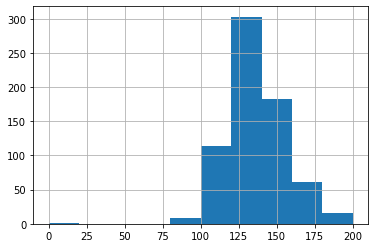

In [68]:
X_train.trestbps.hist()

<AxesSubplot:xlabel='trestbps', ylabel='Count'>

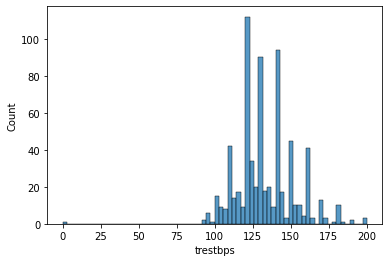

In [69]:
sns.histplot(X_train, x='trestbps', bins=70)

En este histograma se puede observar cómo los datos siguen una distribución normal, pero hay algunos valores más frecuentes. Esto puede ser porque algunos médicos tengan tendencia a asignar valores redondeados. 

En este caso, asumimos que la distribución es normal y asignaremos el valor medio a los valores nulos.

In [70]:
trestbps = X_train['trestbps'][X_train['trestbps'].notnull()].to_numpy().reshape(-1,1)

trestbps_mean = np.mean(trestbps)
print(trestbps_mean)

X_train['trestbps'] = X_train['trestbps'].fillna(trestbps_mean)

132.6448326055313


C:\Users\Angel\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<AxesSubplot:xlabel='trestbps', ylabel='Count'>

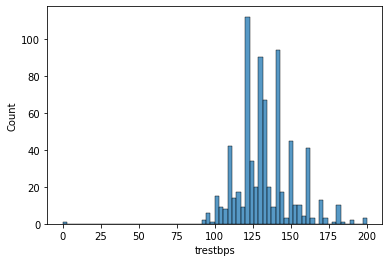

In [71]:
sns.histplot(X_train, x='trestbps', bins=70)

<AxesSubplot:>

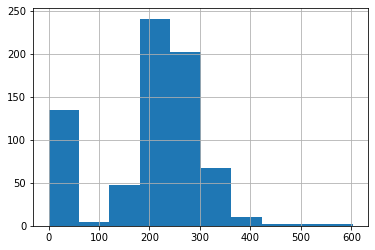

In [72]:
X_train.chol.hist()

### Data Cleaning Cholesterol & Data Exploration

<AxesSubplot:xlabel='chol', ylabel='Count'>

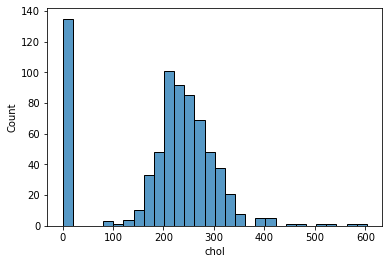

In [73]:
sns.histplot(X_train, x='chol', bins=30)

In [74]:
X_train.chol.head()

835    306.0
680      0.0
725      0.0
564    342.0
329    315.0
Name: chol, dtype: float64

En este caso, podemos categorizar los valores numéricos y discretizar esta variable en función del nivel de colesterol. Según criterios médicos, valores por debajo de 200 son niveles de colesterol adecuados para mantener una buena salud cardiovascular. Valores entre 200 y 239 son considerados de riesgo y de 240 o mayores son peligrosos.

En esta variable vuelven a ver missing values. Estos los substiuiré por la mediana. En este caso, aunque la mayor parte de los datos siguen una distribución normal, una parte de ellos están en otro "clúster". Es por eso por lo que en este caso no puedo asumir que los datos sean normales y prefiero substituir los valores por la mediana.

REFERENCES:

Cholesterol Numbers and What They Mean (https://my.clevelandclinic.org/health/articles/11920-cholesterol-numbers-what-do-they-mean)

In [75]:
chol = X_train['chol'][X_train['chol'].notnull()].to_numpy().reshape(-1,1)

chol_median = np.median(chol)

print(chol_median)

X_train['chol'] = X_train['chol'].fillna(chol_median)

225.0


C:\Users\Angel\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


<AxesSubplot:xlabel='chol', ylabel='Count'>

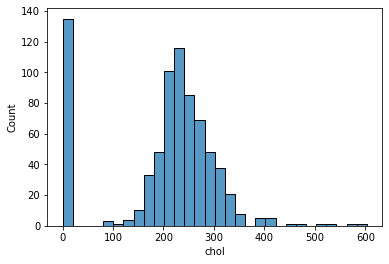

In [76]:
sns.histplot(X_train, x='chol', bins=30)

In [77]:
X_train.insert(4, "chol_cat", X_train['chol'])
X_train.head()

,age,sex,cp,trestbps,chol_cat,chol,fbs,restecg,thalch,exang,oldpeak,slope
835,64,Male,asymptomatic,132.644833,306.0,306.0,True,st-t abnormality,NaN,NaN,NaN,NaN
680,61,Male,non-anginal,200.000000,0.0,0.0,NaN,st-t abnormality,70.0,False,0.0,NaN
725,66,Male,non-anginal,120.000000,0.0,0.0,False,st-t abnormality,120.0,False,-0.5,upsloping
564,52,Male,asymptomatic,112.000000,342.0,342.0,False,st-t abnormality,96.0,True,1.0,flat
329,37,Male,asymptomatic,130.000000,315.0,315.0,False,normal,158.0,False,0.0,NaN


In [78]:
X_train.head()

,age,sex,cp,trestbps,chol_cat,chol,fbs,restecg,thalch,exang,oldpeak,slope
835,64,Male,asymptomatic,132.644833,306.0,306.0,True,st-t abnormality,NaN,NaN,NaN,NaN
680,61,Male,non-anginal,200.000000,0.0,0.0,NaN,st-t abnormality,70.0,False,0.0,NaN
725,66,Male,non-anginal,120.000000,0.0,0.0,False,st-t abnormality,120.0,False,-0.5,upsloping
564,52,Male,asymptomatic,112.000000,342.0,342.0,False,st-t abnormality,96.0,True,1.0,flat
329,37,Male,asymptomatic,130.000000,315.0,315.0,False,normal,158.0,False,0.0,NaN


In [79]:
X_train['chol_cat'].loc[(X_train['chol'] < 240)] = 'risk'
X_train['chol_cat'].loc[(X_train['chol'] >= 240)] = 'danger'
X_train['chol_cat'].loc[(X_train['chol'] < 200)] = 'healthy'

C:\Users\Angel\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\Angel\Anaconda3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()


In [80]:
X_train.iloc[5:12]

,age,sex,cp,trestbps,chol_cat,chol,fbs,restecg,thalch,exang,oldpeak,slope
441,53,Male,asymptomatic,130.000000,healthy,182.0,False,normal,148.0,False,0.0,NaN
326,37,Male,atypical angina,130.000000,danger,283.0,False,st-t abnormality,98.0,False,0.0,NaN
905,61,Male,non-anginal,132.644833,danger,284.0,False,normal,NaN,NaN,NaN,NaN
866,59,Male,asymptomatic,140.000000,danger,274.0,False,normal,154.0,True,2.0,flat
151,42,Female,asymptomatic,102.000000,danger,265.0,False,lv hypertrophy,122.0,False,0.6,flat
838,59,Male,asymptomatic,125.000000,risk,222.0,False,normal,135.0,True,2.5,downsloping
766,59,Male,asymptomatic,122.000000,risk,233.0,False,normal,117.0,True,1.3,downsloping


### Data Cleaning fbs & Data Exploration (I)

<AxesSubplot:xlabel='fbs', ylabel='Count'>

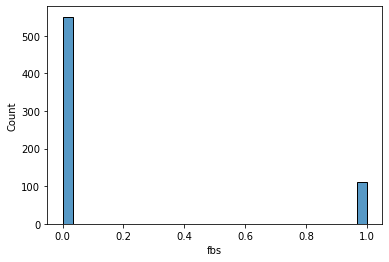

In [81]:
sns.histplot(X_train, x='fbs', bins=30)

En este caso se trata de un ejemplo de variable binaria. Para asignar los missing values, podríamos elaborar diferentes estrategias. Por ejemplo, podríamos asignar las instancias con valores perdidos a la categoría más frecuente. Otra alternativa es generar un modelo con el resto de valores y predecir los valores nulos. En este caso, voy a usar esta estrategia. Primero, voy a limpiar y asegurarme que no hay valores nulos en el resto de variables y después continuaré con la limpieza de esta variable.

En este caso, sólo quiero mostrar que se pueden utilizar modelos de Machine Learning durante la fase de limpieza de datos para predecir los valores nulos, pero no voy a centrarme en los aspectos formales de los modelos para mejorar su rendimiento.

### Data Cleaning restecg & Data Exploration

<AxesSubplot:xlabel='restecg', ylabel='Count'>

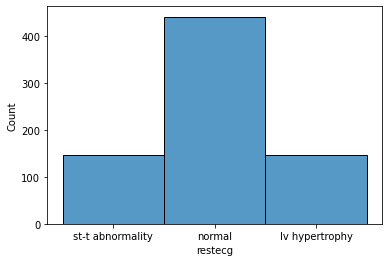

In [82]:
sns.histplot(X_train, x='restecg', bins=30)

En este caso, al haber un único valor nulo, voy a asignarlo a la categoría mayoritaria.

In [83]:
print(set(X_train.restecg))

X_train['restecg'] = X_train['restecg'].fillna('normal')

{'st-t abnormality', nan, 'lv hypertrophy', 'normal'}


C:\Users\Angel\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


### Data Cleaning thalch & Data Exploration

<AxesSubplot:xlabel='thalch', ylabel='Count'>

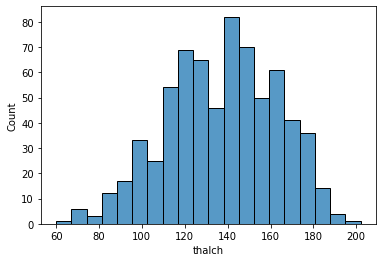

In [84]:
sns.histplot(X_train, x='thalch', bins=20)

De nuevo tenemos una variable numérica que sigue una distribución normal, en este caso voy a substituir los valores nulos por el valor medio.

In [85]:
thalch_mean = np.mean(X_train.thalch)
print(thalch_mean)

X_train['thalch'] = X_train['thalch'].fillna(thalch_mean)

137.3231884057971


C:\Users\Angel\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


### Data Cleaning exang & Data Exploration

<AxesSubplot:xlabel='exang', ylabel='Count'>

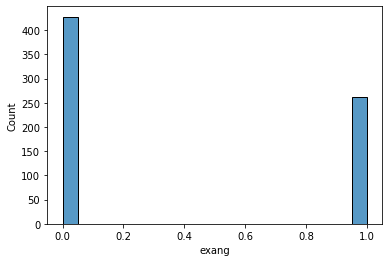

In [86]:
sns.histplot(X_train, x='exang', bins=20)

En este caso, voy a volver a utilizar el valor más frecuente para rellenar los NaN values.

In [87]:
print(set(X_train['exang']))
X_train['exang'] = X_train['exang'].fillna('False')

{nan, False, True}


C:\Users\Angel\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### Data Cleaning oldpeak & Data Exploration

<AxesSubplot:xlabel='oldpeak', ylabel='Count'>

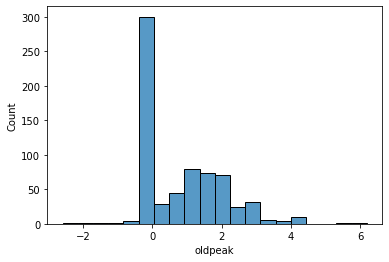

In [88]:
sns.histplot(X_train, x='oldpeak', bins=20)

De nuevo tenemos una variable numérica que no sigue distribución normal, en este caso voy a substituir los valores nulos por la mediana.

In [89]:
oldpeak = X_train['oldpeak'][X_train['oldpeak'].notnull()].to_numpy().reshape(-1,1)

oldpeak_median = np.median(oldpeak)
print(oldpeak_median)

X_train['oldpeak'] = X_train['oldpeak'].fillna(oldpeak_median)

0.5


C:\Users\Angel\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### Data Cleaning slope & Data Exploration

<AxesSubplot:xlabel='slope', ylabel='Count'>

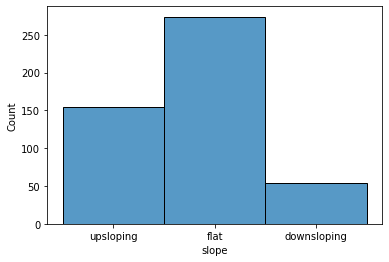

In [90]:
sns.histplot(X_train, x='slope', bins=20)

En este caso, al tratarse de muchos valores nulos, podemos simplemente eliminar este atributo. He decidido hacer esto porque utilizar otro método podía introducir mucho ruido en esta variable.

In [91]:
X_train = X_train.drop(columns=['slope'])

### Data Cleaning fbs & Data Exploration (II)

In [92]:
X_train.isna().sum()[X_train.isna().sum() > 0] # show nan of cols with nan

fbs    73
dtype: int64

In [93]:
X_train.head()

,age,sex,cp,trestbps,chol_cat,chol,fbs,restecg,thalch,exang,oldpeak
835,64,Male,asymptomatic,132.644833,danger,306.0,True,st-t abnormality,137.323188,False,0.5
680,61,Male,non-anginal,200.000000,healthy,0.0,NaN,st-t abnormality,70.000000,False,0.0
725,66,Male,non-anginal,120.000000,healthy,0.0,False,st-t abnormality,120.000000,False,-0.5
564,52,Male,asymptomatic,112.000000,danger,342.0,False,st-t abnormality,96.000000,True,1.0
329,37,Male,asymptomatic,130.000000,danger,315.0,False,normal,158.000000,False,0.0


Antes de esto vamos a tener que transformar los datos categoricos en variables dummies y normalizar los datos numéricos.

### Transformación de los datos

In [94]:
X_train_cat = X_train[['cp', 'sex', 'chol_cat', 'restecg', 'exang']]
X_train_cat.head()

,cp,sex,chol_cat,restecg,exang
835,asymptomatic,Male,danger,st-t abnormality,False
680,non-anginal,Male,healthy,st-t abnormality,False
725,non-anginal,Male,healthy,st-t abnormality,False
564,asymptomatic,Male,danger,st-t abnormality,True
329,asymptomatic,Male,danger,normal,False


In [95]:
X_train_num = X_train[['age', 'trestbps', 'thalch', 'oldpeak']]
X_train_num.head()

,age,trestbps,thalch,oldpeak
835,64,132.644833,137.323188,0.5
680,61,200.000000,70.000000,0.0
725,66,120.000000,120.000000,-0.5
564,52,112.000000,96.000000,1.0
329,37,130.000000,158.000000,0.0


In [96]:
X_train_cat_dum = pd.get_dummies(X_train_cat)
X_train_cat_dum.head()

,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina,sex_Female,sex_Male,chol_cat_danger,chol_cat_healthy,chol_cat_risk,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,exang_False,exang_True,exang_False
835,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1
680,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0
725,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0
564,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0
329,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0


In [97]:
# para normalizar los datos, puedo usar la siguiene función:

def norm_df(df: pd.DataFrame()):
    brain_norm = (df - df.mean())/df.std()
    return brain_norm

In [98]:
X_train_num_norm = norm_df(X_train_num)
X_train_num_norm.head()

,age,trestbps,thalch,oldpeak
835,1.099331,7.683810e-15,-5.678807e-15,-0.339075
680,0.780869,3.641894e+00,-2.690305e+00,-0.805192
725,1.311640,-6.837062e-01,-6.922528e-01,-1.271309
564,-0.174520,-1.116266e+00,-1.651318e+00,0.127042
329,-1.766834,-1.430061e-01,8.262671e-01,-0.805192


In [99]:
# junto de nuevo los datos categóricos y cuantitativos

X_train_cl = pd.merge(X_train_num_norm, X_train_cat_dum, left_index=True, right_index=True)
X_train_cl.head()

,age,trestbps,thalch,oldpeak,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina,sex_Female,sex_Male,chol_cat_danger,chol_cat_healthy,chol_cat_risk,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,exang_False,exang_True,exang_False
835,1.099331,7.683810e-15,-5.678807e-15,-0.339075,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1
680,0.780869,3.641894e+00,-2.690305e+00,-0.805192,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0
725,1.311640,-6.837062e-01,-6.922528e-01,-1.271309,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0
564,-0.174520,-1.116266e+00,-1.651318e+00,0.127042,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0
329,-1.766834,-1.430061e-01,8.262671e-01,-0.805192,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0


In [101]:
X_train_cl_fbs = pd.merge(X_train_cl, X_train['fbs'], left_index=True, right_index=True)
X_train_cl_fbs.head()

,age,trestbps,thalch,oldpeak,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina,sex_Female,sex_Male,chol_cat_danger,chol_cat_healthy,chol_cat_risk,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,exang_False,exang_True,exang_False,fbs
835,1.099331,7.683810e-15,-5.678807e-15,-0.339075,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,True
680,0.780869,3.641894e+00,-2.690305e+00,-0.805192,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,NaN
725,1.311640,-6.837062e-01,-6.922528e-01,-1.271309,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,False
564,-0.174520,-1.116266e+00,-1.651318e+00,0.127042,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,False
329,-1.766834,-1.430061e-01,8.262671e-01,-0.805192,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0,False


In [102]:
X_train_nonan.shape

(663, 11)

En este caso, voy a validar con un test muy pequeño. No quiero hacer el dataset de train excesivamente pequeño porque ya es la segunda partición de los datos y corro el riesgo de usar un dataset de entrenamiento excesivamente pequeño.

In [51]:
pd.get_dummies

<function pandas.core.reshape.reshape.get_dummies(data, prefix=None, prefix_sep='_', dummy_na: 'bool' = False, columns=None, sparse: 'bool' = False, drop_first: 'bool' = False, dtype: 'Dtype | None' = None) -> 'DataFrame'>

In [52]:
X = X_train_nonan_pred
y = X_train_nonan.fbs

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=23)

In [53]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(X_train, y_train)

ValueError: could not convert string to float: 'risk'

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
y.head()

In [ ]:
clf.predict

# Clustering
# not look ahead
# !

In [ ]:
from sklearn import cluster

def kmeans_sse(k:int, X):
    random.seed(42)

    kmeans = cluster.KMeans(n_clusters=k, random_state=42)
    y_pred = kmeans.fit_predict(X)

    return kmeans.inertia_

def plot_sse(X):
    K_vals = np.linspace(1,10,10).astype(int)
    sse_values =[]

    for ki in K_vals:
        sse_score = kmeans_sse(ki, X)

        sse_values.append(sse_score)

    return plt.plot(K_vals, sse_values)

In [ ]:
X_train[X_train['trestbps'].notnull()]

In [ ]:
plot_sse(X_train['trestbps'][X_train['trestbps'].notnull()].to_numpy().reshape(-1,1))

Mirando el resultado, se puede ver como k=2 es el valor más adecuado de k. Porque el codo se produce cuando k=2, después aumentar el número de clústers no reduce en gran medida el valor de SSE. 

Por esta razón, voy a separar estos datos en dos grupos. Antes de eso, voy a decidir qué hacer con los valores nulos:

En la visualización anterior hemos visto que la distribución de los datos no seguía una distribución normal. Por ello, voy a utilzar el valor de la mediana para los valores nulos en la base de datos actual.

In [ ]:
trestbps = X_train['trestbps'][X_train['trestbps'].notnull()].to_numpy().reshape(-1,1)

trestbps_median = np.median(trestbps)
print(trestbps_median)

In [ ]:
X_train['trestbps'] = X_train['trestbps'].fillna(trestbps_median)

In [ ]:
X_train.isna().sum()[X_train.isna().sum() > 0]

In [ ]:
trestbps_cl = X_train['trestbps'].to_numpy().reshape(-1,1)

kmeans = cluster.KMeans(n_clusters=2, random_state=42)
y_pred = kmeans.fit_predict(trestbps_cl)

In [ ]:
X_train.head()

In [ ]:
X_train.insert(5, "pressure_blood_cat", kmeans.labels_)

X_train.head()

In [ ]:
sns.histplot(X_train, x="trestbps", hue="pressure_blood_cat")

Pese a ello, podemos emplear un método de clusterización como KMeans para detectar los límites y el número adecuado de grupos, que aunque sospecho que son dos, el alogritmo nos podría ayudar a resolver estas dudas. 

Para aplicar este algoritmo, lo primero va a ser seleccionar el número de grupos, mediante el valor de k. 

Para seleccionar este valor existen diferentes métodos como el del Codo. El objetivo es seleecionar un valor de k que valores más grandes no disminuyan sustancialmente el error.

Como es probable que vuelva a usar este método con otras variables, voy a crear una función para calcular la inertia o SSE.